In [57]:
!pip install imbalanced-learn


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import random
from pprint import pprint

#IMPORTANDO O DATASET

In [3]:
df = pd.read_csv("Mentalhealth.csv", low_memory=False)

df.head()

,COUNTRYNEW,WPID_RANDOM,WGT,PROJWT,FIELD_DATE,YEAR_WAVE,W1,W2,W3,W4,...,age_var1,age_var2,age_var3,Gender,Education,Household_Income,Global11Regions,wbi,Subjective_Income,EMP_2010
0,United States,178216898,0.803440,211560.29700,10/01/2020,2020,2,1,2,2,...,3,4,4,2,2,5,9,4,2,6
1,United States,159107018,0.729590,192114.26740,10/01/2020,2020,1,1,3,1,...,1,1,1,1,3,4,9,4,1,1
2,United States,203166417,0.848559,223440.98710,10/01/2020,2020,1,1,3,1,...,1,1,2,1,3,4,9,4,1,1
3,United States,201061719,0.341083,89813.41772,10/01/2020,2020,2,1,3,2,...,3,3,4,2,3,4,9,4,2,1
4,United States,195404162,0.995933,262247.16630,10/01/2020,2020,3,1,2,1,...,2,2,3,1,2,2,9,4,4,6


#ANALISE EXPLORATORIA DE DADOS E PRÉ-PROCESSAMENTO

##Filtrando o dataset para somente paises sul americanos

In [4]:

# Verificar o nome exato da coluna de países
df['COUNTRYNEW'].unique()


array(['United States', 'Egypt', 'Morocco', 'Lebanon', 'Saudi Arabia',
       'Jordan', 'Turkey', 'Indonesia', 'Bangladesh', 'United Kingdom',
       'France', 'Germany', 'Netherlands', 'Belgium', 'Spain', 'Italy',
       'Poland', 'Hungary', 'Czech Republic', 'Romania', 'Sweden',
       'Greece', 'Denmark', 'Iran', 'Hong Kong', 'Japan', 'China',
       'India', 'Venezuela', 'Brazil', 'Mexico', 'Nigeria', 'Kenya',
       'Tanzania', 'Israel', 'Ghana', 'Uganda', 'Benin', 'South Africa',
       'Canada', 'Australia', 'Philippines', 'Sri Lanka', 'Vietnam',
       'Thailand', 'Cambodia', 'Laos', 'Myanmar', 'New Zealand',
       'Ethiopia', 'Mali', 'Senegal', 'Zambia', 'South Korea', 'Taiwan',
       'Georgia', 'Kazakhstan', 'Kyrgyzstan', 'Moldova', 'Russia',
       'Ukraine', 'Burkina Faso', 'Cameroon', 'Zimbabwe', 'Costa Rica',
       'Albania', 'Algeria', 'Argentina', 'Austria', 'Bahrain', 'Bolivia',
       'Bosnia Herzegovina', 'Bulgaria', 'Chile', 'Colombia',
       'Congo Brazzaville'

In [5]:
paises_sul_americanos = [
    'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia',
    'Ecuador', 'Paraguay', 'Peru', 'Uruguay', 'Venezuela'
]

df_SulAmericanos = df[df['COUNTRYNEW'].isin(paises_sul_americanos)]

#Verificando a quantidade de amostras do novo dataset
df_SulAmericanos['COUNTRYNEW'].unique()



array(['Venezuela', 'Brazil', 'Argentina', 'Bolivia', 'Chile', 'Colombia',
       'Ecuador', 'Paraguay', 'Peru', 'Uruguay'], dtype=object)

##Removendo colunas que sao somente de descrição ou não tem necessidade de estudo para o dataset

In [6]:

df_SulAmerica_util = df_SulAmericanos.drop(columns=['WPID_RANDOM', 'FIELD_DATE', 'PROJWT', 'WGT',
                      'YEAR_WAVE','Global11Regions','age_var1',
                      'age_var2', 'Age','WP21757', 'WP21758',
                      ])
df_SulAmerica_util.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10028 entries, 32689 to 117083
Data columns (total 78 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   COUNTRYNEW         10028 non-null  object
 1   W1                 10028 non-null  int64 
 2   W2                 10028 non-null  int64 
 3   W3                 10028 non-null  object
 4   W4                 10028 non-null  object
 5   W5A                10028 non-null  int64 
 6   W5B                10028 non-null  object
 7   W5C                10028 non-null  int64 
 8   W5D                10028 non-null  object
 9   W5E                10028 non-null  int64 
 10  W5F                10028 non-null  int64 
 11  W5G                10028 non-null  int64 
 12  W6                 10028 non-null  int64 
 13  W7A                10028 non-null  int64 
 14  W7B                10028 non-null  int64 
 15  W7C                10028 non-null  object
 16  W8                 10028 non-null  int64

## Transformando as colunas object em int e aplicando ordinalidade ( se necessario )

In [7]:
colunas_ordinais = [
    'W1','W2','W3', 'W4', 'W5A','W5B','W5C', 'W5D','W5E','W5F','W5G','W6','W7A','W7B', 'W7C','W8','W9','W11A'
    ,'W14','W11B',
    'W30', 'age_mh', 'Household_Income',
    'MH1', 'MH2A', 'MH2B', 'MH3B', 'MH4B', 'MH5', 'MH6', 'MH3A','MH3B','MH3C','MH3D',
    'MH4A','MH4B','MH5','MH9A','MH9B', 'MH9C', 'MH9D', 'MH9E', 'MH9F',
    'MH9G','MH9H','W28','W29', 'age_mh', 'wbi', 'subjective_Income'
]

colunas_ordinais_inverter = [
    'W1','W2','W3', 'W4', 'W5A','W5B','W5C', 'W5D','W5E','W5F','W5G','W6','W7A','W7B', 'W7C','W8','W9','W11A'
    ,'W14','W11B',
    'W30',
    'MH1', 'MH2A', 'MH2B', 'MH3B', 'MH4B', 'MH5', 'MH6', 'MH3A','MH3B','MH3C','MH3D',
    'MH4A','MH4B','MH5','MH9A','MH9B', 'MH9C', 'MH9D', 'MH9E', 'MH9F',
    'MH9G','MH9H','W28','W29', 'age_mh', 'wbi', 'subjective_Income'
]

colunas_nominais = ['COUNTRYNEW','MH7B_2','EMP_2010']

colunas_booleanas = ['MH6','MH7A','MH7C','MH8A','MH8B','MH8C','MH8D','MH8E','MH8F','MH8G','MH8H','W27']

for col in colunas_ordinais:
    if col in df_SulAmerica_util.columns:
        df_SulAmerica_util[col] = df_SulAmerica_util[col].replace([' ', '', '99', 99], np.nan)
        df_SulAmerica_util[col] = pd.to_numeric(df_SulAmerica_util[col], errors='coerce')


for col in colunas_booleanas:
    if col in df_SulAmerica_util.columns:
        df_SulAmerica_util[col] = df_SulAmerica_util[col].astype(str).str.strip()
        df_SulAmerica_util[col] = df_SulAmerica_util[col].replace({
            '1': 1, '2': 0, '99': np.nan, '99.0': np.nan, '': np.nan, 'nan': np.nan
        })
        df_SulAmerica_util[col] = pd.to_numeric(df_SulAmerica_util[col], errors='coerce')
        df_SulAmerica_util[col] = df_SulAmerica_util[col].astype('Int64')


df_Numerico = pd.get_dummies(df_SulAmerica_util, columns=colunas_nominais, dummy_na=False)

colunas_Onehot = df_Numerico.select_dtypes(include='bool').columns

df_Numerico[colunas_Onehot] = df_Numerico[colunas_Onehot].astype('float')

df_Numerico['MH7B'] = df_Numerico['MH7B'].astype(str).str.strip()

df_Numerico['MH7B'] = df_Numerico['MH7B'].replace({
    '99': np.nan,
    '97+': np.nan,
    '97': np.nan,
    '': np.nan,
    'nan': np.nan
})

df_Numerico['MH7B'] = pd.to_numeric(df_Numerico['MH7B'], errors='coerce')

df_Numerico['MH7B'] = df_Numerico['MH7B'].astype('Int64')



for col in colunas_ordinais_inverter:
    if col in df_Numerico.columns:
        valores = df_Numerico[col].dropna().unique()
        if len(valores) > 1:
            max_val = max(valores)
            min_val = min(valores)
            df_Numerico[col] = df_Numerico[col].apply(
                lambda x: (max_val + min_val) - x if pd.notna(x) else x
            )

<ipython-input-7-bd13bd386e77>:32: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_SulAmerica_util[col] = df_SulAmerica_util[col].replace({
<ipython-input-7-bd13bd386e77>:32: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_SulAmerica_util[col] = df_SulAmerica_util[col].replace({
<ipython-input-7-bd13bd386e77>:32: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, s

In [8]:

df_Numerico.head()

,W1,W2,W3,W4,W5A,W5B,W5C,W5D,W5E,W5F,...,MH7B_2_3,MH7B_2_4,MH7B_2_5,MH7B_2_99,EMP_2010_1,EMP_2010_2,EMP_2010_3,EMP_2010_4,EMP_2010_5,EMP_2010_6
32689,3.0,4.0,0.0,2.0,3.0,1.0,3.0,1.0,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
32690,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32691,3.0,3.0,1.0,3.0,3.0,1.0,2.0,3.0,3.0,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
32692,2.0,3.0,1.0,3.0,3.0,3.0,1.0,2.0,4.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
32693,3.0,3.0,1.0,2.0,3.0,3.0,3.0,2.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


##Verificando valores nulos

In [9]:

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df_Numerico.isnull().sum().sort_values(ascending=False)


,0
MH9D,8502
MH9A,8445
MH9B,8421
MH9F,8117
MH9G,7602
MH9H,7501
MH9E,7452
MH9C,7429
MH7B,6899
MH8F,6839


##Excluindo colunas que possuem muitos valores nulos ou que são incongruentes com o projeto

In [10]:
#Colunas removidas pois são dados somente preenchidos caso a pessoa tenha dito possuir a doença, o que não faz sentido na hora da previsão (por conta disso o grande numero de NaN)
df_Numerico_Relevantes = df_Numerico.drop(columns=['MH9D','MH9A','MH9B', 'MH9F', 'MH8G', 'age_mh'
                                        , 'MH8H', 'MH8E', 'MH7C','MH8B','MH8C', 'MH8D',
                                        'MH8A', 'MH9G','MH9G', 'MH9E', 'MH9C', 'MH7B', 'MH8F', 'MH9H'])



df_Numerico_Relevantes = df_Numerico_Relevantes.apply(pd.to_numeric, errors='coerce').astype('float64')



df_Numerico_Relevantes.isnull().sum().sort_values(ascending=False)




,0
W30,1991
W14,1402
W15,1327
W29,1072
W28,1068
Household_Income,1000
MH2B,788
MH2A,659
W5C,590
W5F,564


##Tratando valores nulos

In [11]:

for col in df_Numerico_Relevantes.columns:
    if df_Numerico_Relevantes[col].isnull().sum() > 0:
        try:
            media = df_Numerico_Relevantes[col].mean()
            media_arredondada = round(media)
            df_Numerico_Relevantes[col] = df_Numerico_Relevantes[col].fillna(media_arredondada)
            print(f"{col}: preenchido com média arredondada -> {media_arredondada}")
        except TypeError:
            print(f"{col}: tipo não numérico ou erro ao calcular média")

df_Numerico_Relevantes.isnull().sum().sort_values(ascending=False)

df_Numerico_Relevantes.value_counts('MH6')

W1: preenchido com média arredondada -> 2
W2: preenchido com média arredondada -> 3
W3: preenchido com média arredondada -> 1
W4: preenchido com média arredondada -> 3
W5A: preenchido com média arredondada -> 3
W5B: preenchido com média arredondada -> 2
W5C: preenchido com média arredondada -> 3
W5D: preenchido com média arredondada -> 2
W5E: preenchido com média arredondada -> 3
W5F: preenchido com média arredondada -> 3
W5G: preenchido com média arredondada -> 2
W6: preenchido com média arredondada -> 3
W7A: preenchido com média arredondada -> 3
W7B: preenchido com média arredondada -> 3
W7C: preenchido com média arredondada -> 2
W8: preenchido com média arredondada -> 2
W9: preenchido com média arredondada -> 2
W11A: preenchido com média arredondada -> 3
W11B: preenchido com média arredondada -> 3
MH2A: preenchido com média arredondada -> 4
MH2B: preenchido com média arredondada -> 3
W14: preenchido com média arredondada -> 3
W15: preenchido com média arredondada -> 2
MH1: preenchid

,count
MH6,
2.0,5847
1.0,4181


In [12]:

display(df_Numerico_Relevantes.head())

,W1,W2,W3,W4,W5A,W5B,W5C,W5D,W5E,W5F,W5G,W6,W7A,W7B,W7C,W8,W9,W10,W11A,W11B,MH2A,MH2B,W13,W14,W15,W15_1A,W15_1B,W15_1C,W15_1D,W15_1E,W15_2A,W15_2B,MH1,MH3A,MH3B,MH3C,MH3D,MH4A,MH4B,MH5,MH6,MH7A,W27,W28,W29,W30,WP21759,WP21760,WP21761,WP21768,age_var3,Gender,Education,Household_Income,wbi,Subjective_Income,COUNTRYNEW_Argentina,COUNTRYNEW_Bolivia,COUNTRYNEW_Brazil,COUNTRYNEW_Chile,COUNTRYNEW_Colombia,COUNTRYNEW_Ecuador,COUNTRYNEW_Paraguay,COUNTRYNEW_Peru,COUNTRYNEW_Uruguay,COUNTRYNEW_Venezuela,MH7B_2_,MH7B_2_1,MH7B_2_2,MH7B_2_3,MH7B_2_4,MH7B_2_5,MH7B_2_99,EMP_2010_1,EMP_2010_2,EMP_2010_3,EMP_2010_4,EMP_2010_5,EMP_2010_6
32689,3.0,4.0,0.0,2.0,3.0,1.0,3.0,1.0,4.0,1.0,3.0,4.0,4.0,3.0,1.0,1.0,2.0,2.0,4.0,4.0,4.0,4.0,1.0,4.0,1.0,3.0,1.0,1.0,1.0,2.0,4.0,1.0,3.0,4.0,1.0,4.0,4.0,4.0,1.0,2.0,2.0,1.0,1.0,6.0,4.0,2.0,2.0,1.0,1.0,1.0,4.0,1.0,3.0,3.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
32690,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,1.0,3.0,4.0,2.0,3.0,3.0,2.0,1.0,3.0,3.0,4.0,3.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,2.0,4.0,1.0,3.0,4.0,4.0,1.0,3.0,1.0,0.0,1.0,4.0,2.0,3.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32691,3.0,3.0,1.0,3.0,3.0,1.0,2.0,3.0,3.0,3.0,1.0,3.0,2.0,3.0,3.0,1.0,1.0,1.0,4.0,4.0,4.0,3.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,3.0,2.0,4.0,3.0,4.0,2.0,2.0,2.0,0.0,1.0,4.0,2.0,3.0,2.0,2.0,1.0,1.0,3.0,1.0,1.0,3.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
32692,2.0,3.0,1.0,3.0,3.0,3.0,1.0,2.0,4.0,2.0,1.0,4.0,3.0,2.0,2.0,2.0,2.0,1.0,4.0,4.0,4.0,2.0,1.0,4.0,1.0,1.0,1.0,3.0,1.0,3.0,1.0,1.0,3.0,4.0,1.0,4.0,4.0,4.0,1.0,3.0,2.0,1.0,1.0,3.0,2.0,3.0,2.0,1.0,2.0,1.0,3.0,2.0,3.0,3.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
32693,3.0,3.0,1.0,2.0,3.0,3.0,3.0,2.0,3.0,3.0,4.0,3.0,4.0,4.0,3.0,1.0,1.0,1.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,4.0,1.0,4.0,4.0,3.0,2.0,2.0,2.0,1.0,1.0,4.0,4.0,4.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,3.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#Teste

##Aplicando informação mutua

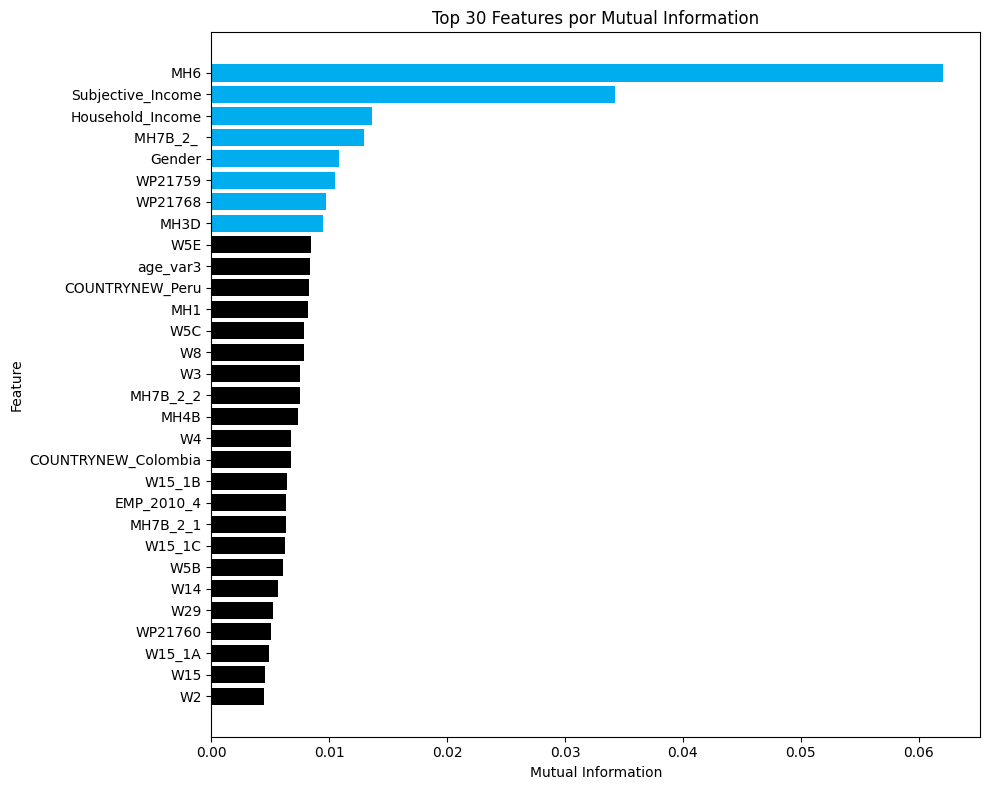

In [17]:
from sklearn.feature_selection import mutual_info_classif


X = df_Numerico_Relevantes.drop(columns=['MH7A'])
y = df_Numerico_Relevantes['MH7A']

mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)


mi_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mi_scores
})



top_n_total = 30
top_n_destaque = 8
azul_slide = '#00AEEF'

mi_df_sorted = mi_df.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)
mi_top_30 = mi_df_sorted.head(top_n_total).reset_index(drop=True)

cores = [azul_slide if i < top_n_destaque else 'black' for i in range(top_n_total)]

plt.figure(figsize=(10, 8))
plt.barh(mi_top_30['Feature'], mi_top_30['Mutual Information'], color=cores)
plt.xlabel('Mutual Information')
plt.ylabel('Feature')
plt.title(f'Top {top_n_total} Features por Mutual Information' )
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()





In [18]:
#Filtro baseado nas 8 melhores features

top_features = mi_df_sorted.head(8)['Feature'].tolist()

X_filtrado = X[top_features]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_filtrado, y, test_size=0.2, random_state=42)

###Fazendo o Balanceamento

<Axes: ylabel='count'>

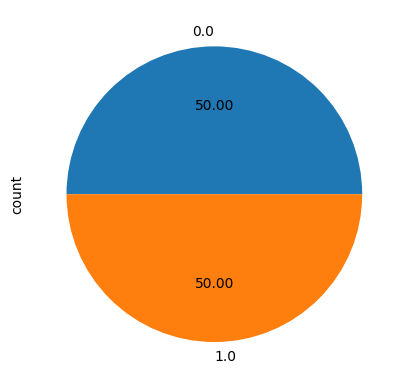

In [20]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

X_train_res = pd.DataFrame(X_train_res, columns=X_train.columns)


y_train_res.value_counts().plot.pie( autopct='%.2f')

###Random forest

=== RANDOM FOREST ===
Acurácia: 0.6754735792622134
Recall: 0.5364741641337386

Matriz de Confusão:


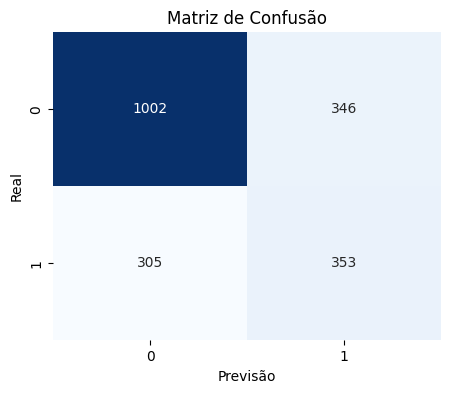

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report

# Treinamento
modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train_res, y_train_res)

# Previsão
y_pred_rf = modelo_rf.predict(X_test)

# Avaliação
print("=== RANDOM FOREST ===")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("\nMatriz de Confusão:")
# Gera a matriz de confusão
cm = confusion_matrix(y_test, y_pred_rf)  # ou y_pred_mlp, y_pred_gb dependendo do modelo
# Exibe visualmente
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()



###Redes neurais (MLPClassifier)

=== REDE NEURAL (MLP) ===
Acurácia: 0.6879361914257228
Recall: 0.743161094224924

Matriz de Confusão:


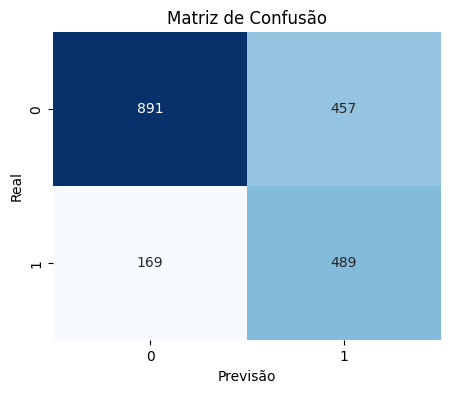

In [22]:
from sklearn.neural_network import MLPClassifier

# Treinamento
modelo_mlp = MLPClassifier(hidden_layer_sizes=(16, 8),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42,)
modelo_mlp.fit(X_train_res, y_train_res)
# Previsão
y_pred_mlp = modelo_mlp.predict(X_test)

# Avaliação
print("=== REDE NEURAL (MLP) ===")
print("Acurácia:", accuracy_score(y_test, y_pred_mlp))
print("Recall:", recall_score(y_test, y_pred_mlp))
print("\nMatriz de Confusão:")
# Gera a matriz de confusão
cm = confusion_matrix(y_test, y_pred_mlp)  # ou y_pred_mlp, y_pred_gb dependendo do modelo
# Exibe visualmente
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()



###Gradient Boosting

=== GRADIENT BOOSTING ===
Acurácia: 0.6959122632103689
Recall: 0.6778115501519757

Matriz de Confusão:


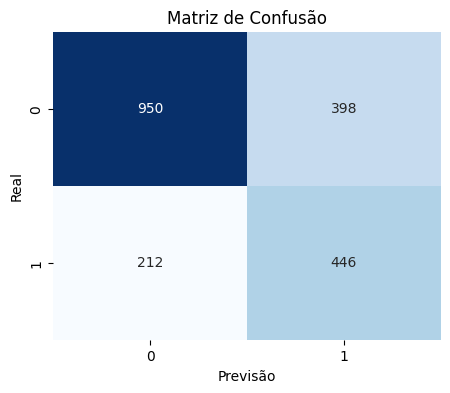

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

# Treinamento
modelo_gb = GradientBoostingClassifier(random_state=42)
modelo_gb.fit(X_train_res, y_train_res)

# Previsão
y_pred_gb = modelo_gb.predict(X_test)

# Avaliação
print("=== GRADIENT BOOSTING ===")
print("Acurácia:", accuracy_score(y_test, y_pred_gb))
print("Recall:", recall_score(y_test, y_pred_gb))
print("\nMatriz de Confusão:")
# Gera a matriz de confusão
cm = confusion_matrix(y_test, y_pred_gb)
# Exibe visualmente
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()


###KNN

Acurácia: 0.6655034895314058
Recall: 0.5729483282674772


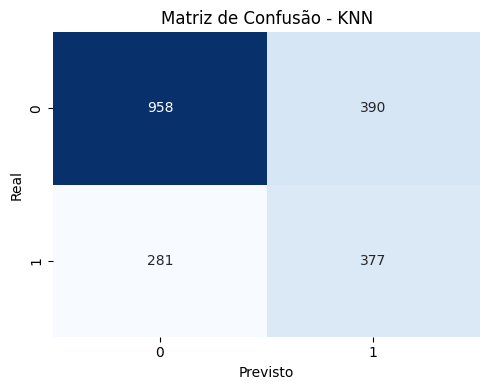

In [24]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


knn = KNeighborsClassifier(n_neighbors=461)
knn.fit(X_train_res, y_train_res)
y_pred_knn = knn.predict(X_test)

# Cálculo dos scores
acuracia = accuracy_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
print("Acurácia:", acuracia)
print("Recall:", recall)

# Matriz de confusão visual
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(5,4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão - KNN')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.tight_layout()
plt.show()


###Naive Bayes

Acurácia: 0.6814556331006979
Recall: 0.6413373860182371


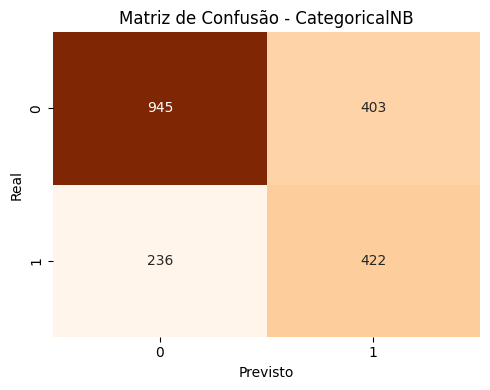

In [25]:
from sklearn.naive_bayes import CategoricalNB

nb_cat = CategoricalNB()
nb_cat.fit(X_train_res, y_train_res)
y_pred_cat = nb_cat.predict(X_test)

# Métricas
acuracia = accuracy_score(y_test, y_pred_cat)
recall = recall_score(y_test, y_pred_cat)

print("Acurácia:", acuracia)
print("Recall:", recall)

# Matriz de confusão
cm_cat = confusion_matrix(y_test, y_pred_cat)
plt.figure(figsize=(5,4))
sns.heatmap(cm_cat, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('Matriz de Confusão - CategoricalNB')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.tight_layout()
plt.show()



##Por filtro da correlação

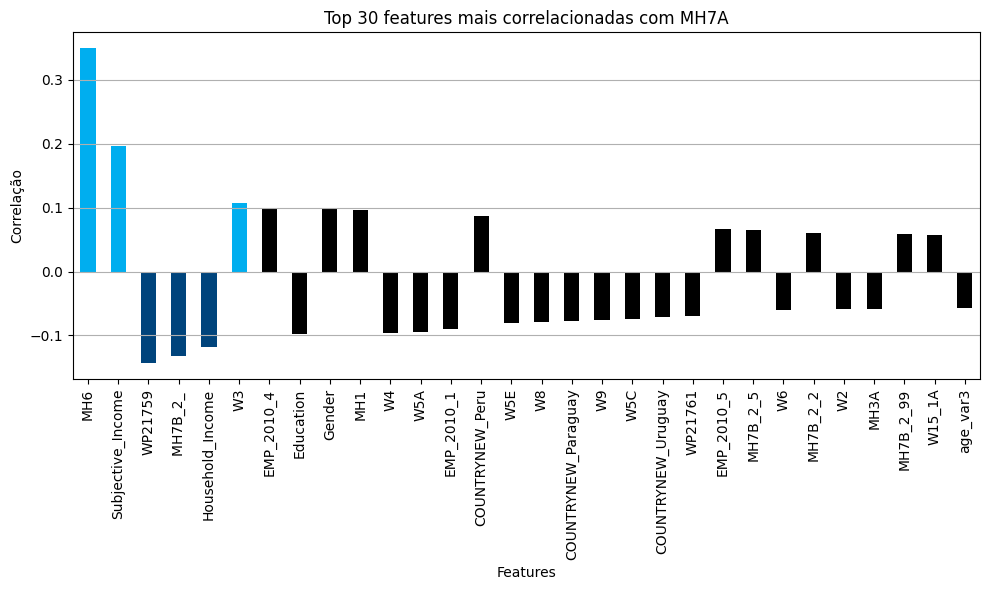

In [26]:


correlacoes_com_alvo = df_Numerico_Relevantes.corr(numeric_only=True, method='kendall')['MH7A'].sort_values(key=abs, ascending=False)


top_n = 30

correlacoes_sem_alvo = correlacoes_com_alvo.drop('MH7A', errors='ignore')

correlacoes_top=correlacoes_sem_alvo.abs().sort_values(ascending=False).head(top_n)

correlacoes_top = correlacoes_sem_alvo[correlacoes_top.index]

azul_slide = '#00AEEF'
azulescuro_slide = '#00447C'
cores = [
    azul_slide if v > 0.1 else azulescuro_slide if v < -0.1 else 'black'
    for v in correlacoes_top
]

plt.figure(figsize=(10,6))
correlacoes_top.plot(kind='bar', color=cores)
plt.title(f'Top {top_n} features mais correlacionadas com MH7A')
plt.xlabel('Features')
plt.ylabel('Correlação')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


###Heatmap

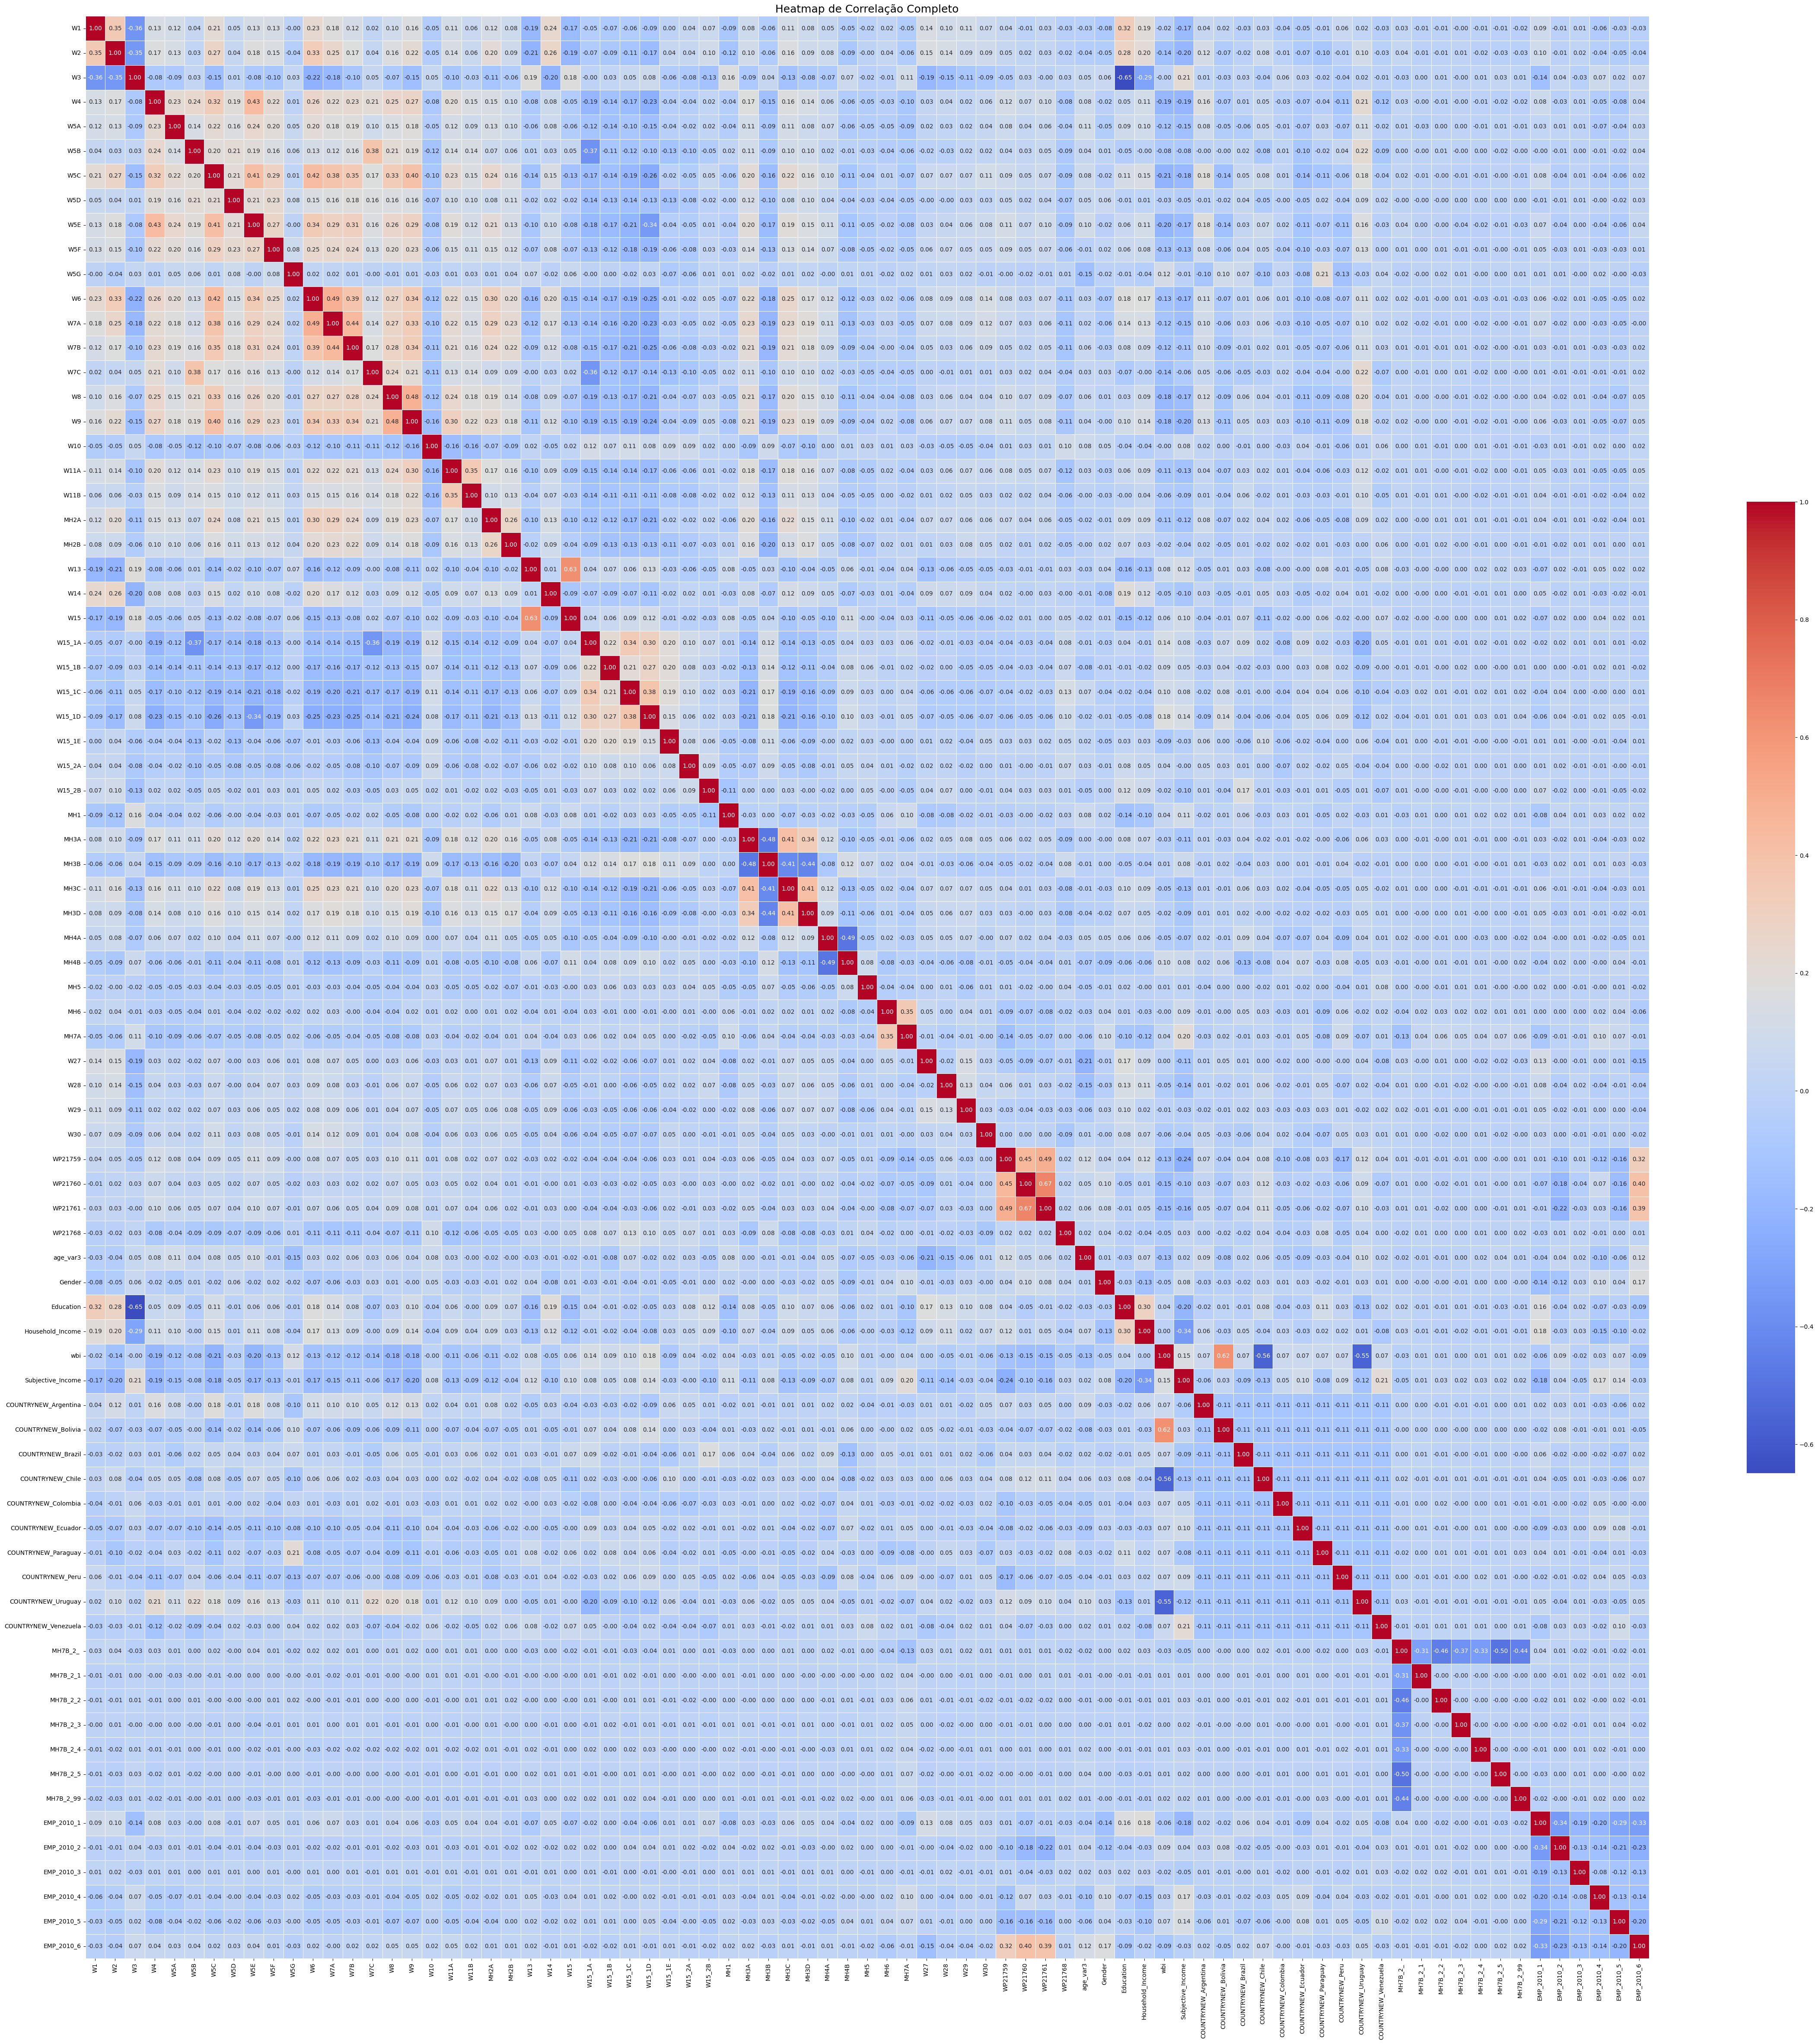

In [27]:
correlacao = df_Numerico_Relevantes.corr(numeric_only=True, method='kendall')


plt.figure(figsize=(len(correlacao.columns) * 0.6, len(correlacao.columns) * 0.6))


sns.heatmap(
    correlacao,
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    square=False,
    cbar_kws={"shrink": 0.5}
)

plt.title("Heatmap de Correlação Completo", fontsize=18)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

###Filtrando as features

In [28]:
#Filtro de limiar
limiar = 0.1
colunas_selecionadas = correlacoes_com_alvo[correlacoes_com_alvo.abs() >= limiar].index.tolist()

print(f"Colunas selecionadas correlação >= {limiar}:")
print(colunas_selecionadas)

df_Numerico_Final = df_Numerico_Relevantes[colunas_selecionadas]

Colunas selecionadas correlação >= 0.1:
['MH7A', 'MH6', 'Subjective_Income', 'WP21759', 'MH7B_2_ ', 'Household_Income', 'W3']


In [29]:
X_cr = df_Numerico_Final.drop('MH7A', axis=1)
y_cr = df_Numerico_Final['MH7A']

In [30]:
y_cr.value_counts()

,count
MH7A,
0.0,6818
1.0,3210


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_cr, y_cr, test_size=0.2, random_state=42)

In [32]:
X_train.value_counts('Subjective_Income')

,count
Subjective_Income,
2.0,3229
3.0,2038
1.0,1330
4.0,1316
6.0,59
5.0,50


In [33]:
from imblearn.over_sampling import RandomOverSampler

over = RandomOverSampler(random_state=42)

X_train_res, y_train_res = over.fit_resample(X_train, y_train)

X_train_res = pd.DataFrame(X_train_res, columns=X_train.columns)

print(y_train_res.value_counts())





MH7A
0.0    5470
1.0    5470
Name: count, dtype: int64


###Random Forest

=== RANDOM FOREST ===
Acurácia: 0.674975074775673
Recall: 0.7355623100303952

Matriz de Confusão:


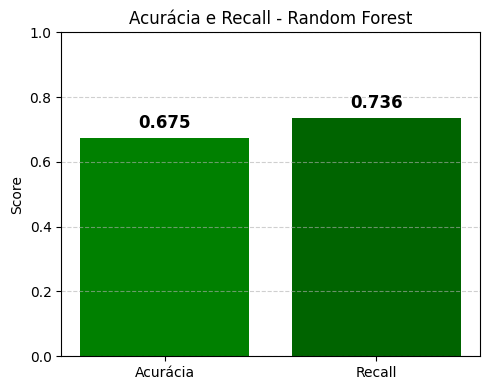

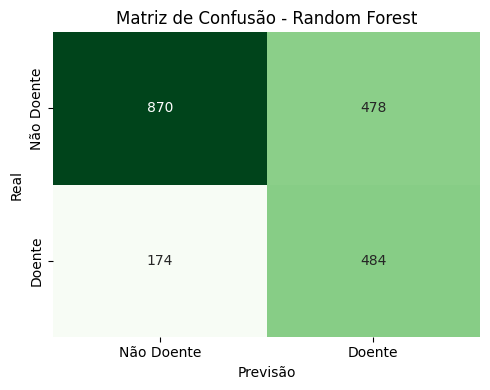

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Treinamento
modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train_res, y_train_res)

# Previsão
y_pred_rf = modelo_rf.predict(X_test)



# Avaliação
print("=== RANDOM FOREST ===")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("\nMatriz de Confusão:")

# Métricas
acuracia_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
#INICIO DO CODIGO DO GRAFICO
metricas = ['Acurácia', 'Recall']
valores = [acuracia_rf, recall_rf]

fig, ax = plt.subplots(figsize=(5,4))
barras = ax.bar(metricas, valores, color=['green', 'darkgreen'])
ax.set_ylim(0, 1)
ax.set_ylabel('Score')
ax.set_title('Acurácia e Recall - Random Forest')
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Adiciona o valor diretamente na barra
ax.bar_label(barras, fmt='%.3f', padding=4, fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Não Doente', 'Doente'],
            yticklabels=['Não Doente', 'Doente'])
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Random Forest')
plt.tight_layout()
plt.show()

###Rede Neural (MLPClassifier)

Acurácia: 0.633
Recall: 0.852


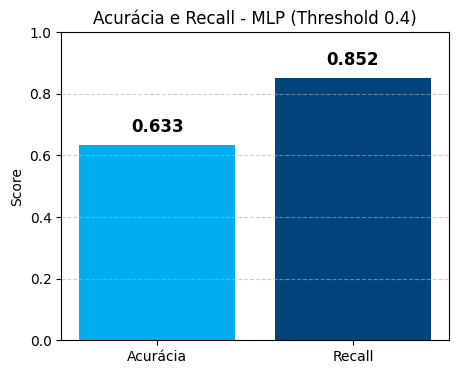

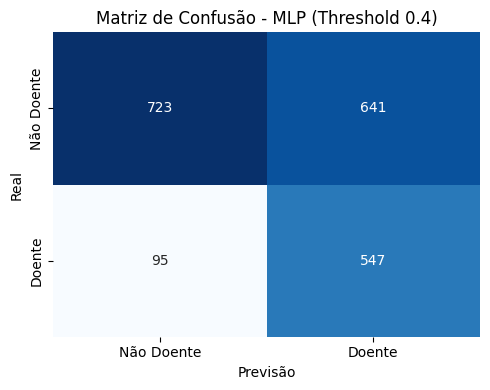

In [56]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
mlp = MLPClassifier(
    hidden_layer_sizes=(32, 16, 8),
    activation='relu',
    solver='adam',
    max_iter=1000,
    alpha=0.001,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.15
)

# Pipeline
pipeline_mlp = Pipeline([
    ('scaler', scaler),
    ('mlp', mlp)
])


pipeline_mlp.fit(X_train_res, y_train_res)

probas = pipeline_mlp.predict_proba(X_test)[:, 1]


threshold = 0.4
y_pred = (probas >= threshold).astype(int)

acuracia_mlp = accuracy_score(y_test, y_pred)
recall_mlp = recall_score(y_test, y_pred)

print(f'Acurácia: {acuracia_mlp:.3f}')
print(f'Recall: {recall_mlp:.3f}')

metricas = ['Acurácia', 'Recall']
valores = [acuracia_mlp, recall_mlp]

plt.figure(figsize=(5,4))
barras = plt.bar(metricas, valores, color=['#00AEEF', '#00447C'])
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Acurácia e Recall - MLP (Threshold 0.4)')
plt.grid(axis='y', linestyle='--', alpha=0.6)

for barra, valor in zip(barras, valores):
    plt.text(barra.get_x() + barra.get_width()/2, valor + 0.03, f'{valor:.3f}',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Não Doente', 'Doente'],
            yticklabels=['Não Doente', 'Doente'])
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão - MLP (Threshold 0.4)')
plt.tight_layout()
plt.show()



In [90]:
import joblib

# Salve o pipeline treinado
joblib.dump(pipeline_mlp, 'pipeline_mlp_final.pkl')


['pipeline_mlp_final.pkl']

In [91]:
from google.colab import files
files.download('pipeline_mlp_final.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###Gradient Boosting

=== GRADIENT BOOSTING ===
Acurácia: 0.6689930209371885
Recall: 0.7386018237082067

Matriz de Confusão:


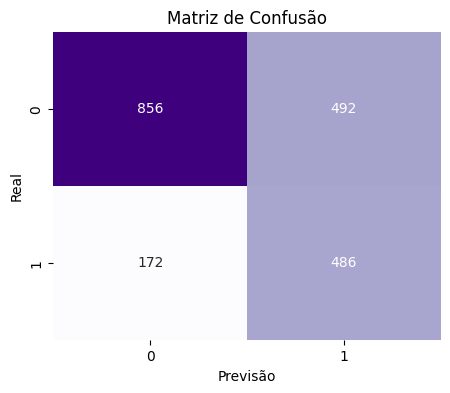

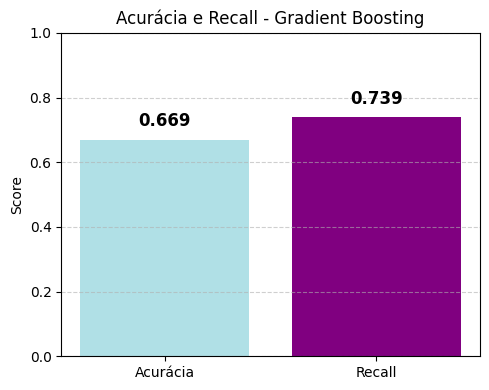

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

modelo_gb = GradientBoostingClassifier(random_state=42)
modelo_gb.fit(X_train_res, y_train_res)

y_pred_gb = modelo_gb.predict(X_test)

print("=== GRADIENT BOOSTING ===")
print("Acurácia:", accuracy_score(y_test, y_pred_gb))
print("Recall:", recall_score(y_test, y_pred_gb))
print("\nMatriz de Confusão:")
cm = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

acuracia_gb = accuracy_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
metricas = ['Acurácia', 'Recall']
valores = [acuracia_gb, recall_gb]

plt.figure(figsize=(5,4))
barras = plt.bar(metricas, valores, color=['powderblue', 'purple'])
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Acurácia e Recall - Gradient Boosting')
plt.grid(axis='y', linestyle='--', alpha=0.6)
for barra, valor in zip(barras, valores):
    plt.text(barra.get_x() + barra.get_width()/2, valor + 0.03, f'{valor:.3f}',
             ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()


###KNN

KNN:
Acurácia: 0.67098703888335
Recall: 0.7066869300911854


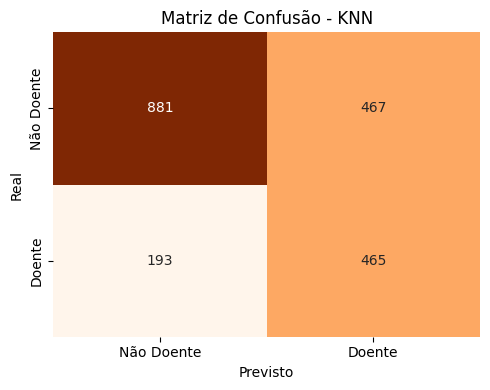

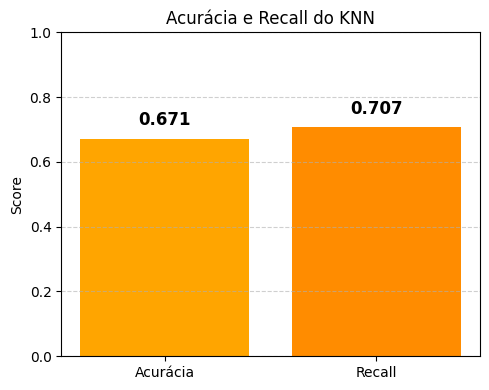

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)


knn = KNeighborsClassifier(n_neighbors=461)
knn.fit(X_train_res_scaled, y_train_res)
y_pred_knn = knn.predict(X_test_scaled)

acuracia_knn = accuracy_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
print("KNN:")
print("Acurácia:", acuracia_knn)
print("Recall:", recall_knn)

cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(5,4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Oranges', cbar=False, xticklabels=['Não Doente', 'Doente'],
            yticklabels=['Não Doente', 'Doente'])
plt.title('Matriz de Confusão - KNN')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.tight_layout()
plt.show()


metricas = ['Acurácia', 'Recall']
valores = [acuracia_knn, recall_knn]

plt.figure(figsize=(5,4))
barras = plt.bar(metricas, valores, color=['orange', 'darkorange'])
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Acurácia e Recall do KNN')
plt.grid(axis='y', linestyle='--', alpha=0.6)

for barra, valor in zip(barras, valores):
    plt.text(barra.get_x() + barra.get_width()/2, valor + 0.03, f'{valor:.3f}',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


###Naive Bayes


Categorical Naive Bayes:
Acurácia: 0.6854436689930209
Recall: 0.6443768996960486


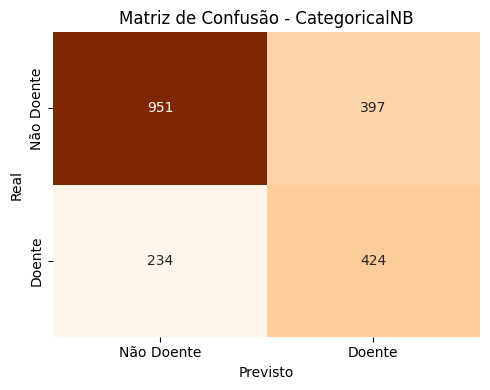

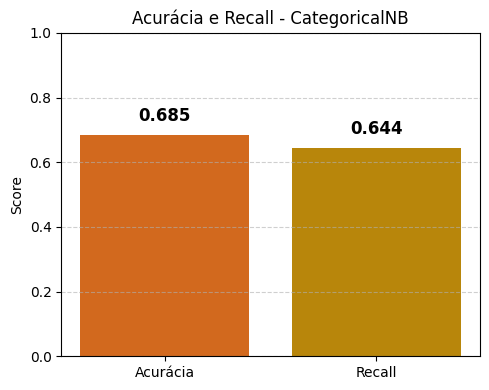

In [40]:

nb_cat = CategoricalNB()
nb_cat.fit(X_train_res, y_train_res)
y_pred_cat = nb_cat.predict(X_test)

acuracia_cat = accuracy_score(y_test, y_pred_cat)
recall_cat = recall_score(y_test, y_pred_cat)
print("\nCategorical Naive Bayes:")
print("Acurácia:", acuracia_cat)
print("Recall:", recall_cat)

cm_cat = confusion_matrix(y_test, y_pred_cat)
plt.figure(figsize=(5,4))
sns.heatmap(cm_cat, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=['Não Doente', 'Doente'],
            yticklabels=['Não Doente', 'Doente'])
plt.title('Matriz de Confusão - CategoricalNB')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.tight_layout()
plt.show()

metricas = ['Acurácia', 'Recall']
valores = [acuracia_cat, recall_cat]

plt.figure(figsize=(5,4))
barras = plt.bar(metricas, valores, color=['chocolate', 'darkgoldenrod'])
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Acurácia e Recall - CategoricalNB')
plt.grid(axis='y', linestyle='--', alpha=0.6)
for barra, valor in zip(barras, valores):
    plt.text(barra.get_x() + barra.get_width()/2, valor + 0.03, f'{valor:.3f}',
             ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

###Grafico comparativo

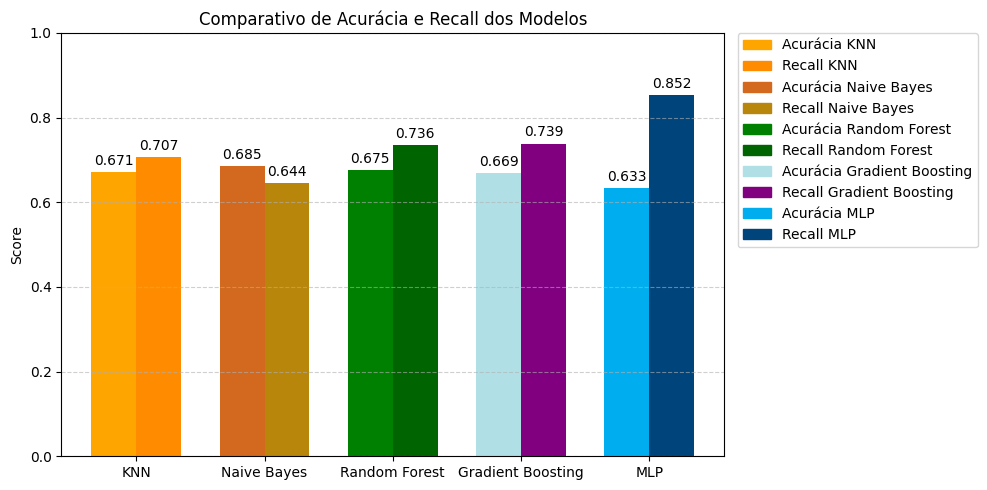

In [50]:
import matplotlib.patches as mpatches
azul_slide = '#00AEEF'
azulescuro_slide = '#00447C'
modelos = ['KNN', 'Naive Bayes', 'Random Forest', 'Gradient Boosting', 'MLP']
acuracias = [acuracia_knn, acuracia_cat, acuracia_rf, acuracia_gb, acuracia_mlp]
recalls = [recall_knn, recall_cat, recall_rf, recall_gb, recall_mlp]

x = np.arange(len(modelos))
largura = 0.35

cores_acuracia = ['orange', 'chocolate', 'green', 'powderblue', azul_slide]
cores_recall = ['darkorange', 'darkgoldenrod', 'darkgreen', 'purple', azulescuro_slide]

plt.figure(figsize=(10,5))
b1 = plt.bar(x - largura/2, acuracias, width=largura, color=cores_acuracia)
b2 = plt.bar(x + largura/2, recalls, width=largura, color=cores_recall)

for barra in b1:
    plt.text(barra.get_x() + barra.get_width()/2, barra.get_height() + 0.01,
             f'{barra.get_height():.3f}', ha='center', va='bottom', fontsize=10)
for barra in b2:
    plt.text(barra.get_x() + barra.get_width()/2, barra.get_height() + 0.01,
             f'{barra.get_height():.3f}', ha='center', va='bottom', fontsize=10)

plt.xticks(x, modelos)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Comparativo de Acurácia e Recall dos Modelos')
plt.grid(axis='y', linestyle='--', alpha=0.6)

legenda = []
for i, modelo in enumerate(modelos):
    legenda.append(mpatches.Patch(color=cores_acuracia[i], label=f'Acurácia {modelo}'))
    legenda.append(mpatches.Patch(color=cores_recall[i], label=f'Recall {modelo}'))

plt.legend(handles=legenda, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()

##Usando o PCA

In [83]:
X_crpca = df_Numerico_Relevantes.drop('MH7A', axis=1)
y_crpca = df_Numerico_Relevantes['MH7A']

In [84]:
from sklearn.decomposition import PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_crpca)

pca = PCA(n_components=6, random_state=42)
X_pca = pca.fit_transform(X_scaled)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

In [86]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)



###Random Forest

=== RANDOM FOREST ===
Acurácia: 0.6585244267198405
Recall: 0.4236760124610592


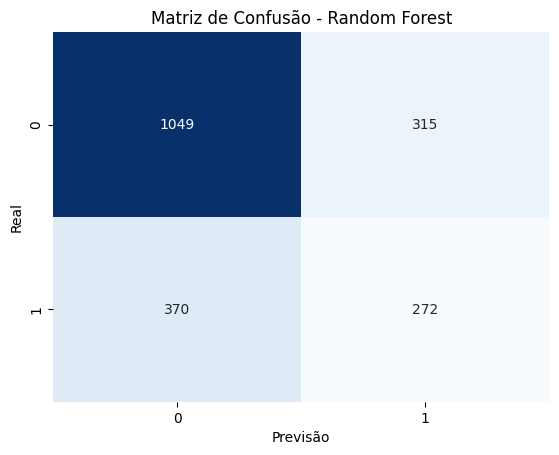

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train_res, y_train_res)
y_pred_rf = modelo_rf.predict(X_test)

print("=== RANDOM FOREST ===")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Previsão")
plt.ylabel("Real")
plt.show()

###Rede Neural ( MLPclassifier)

=== REDE NEURAL (MLP) ===
Acurácia: 0.6470588235294118
Recall: 0.5965732087227414


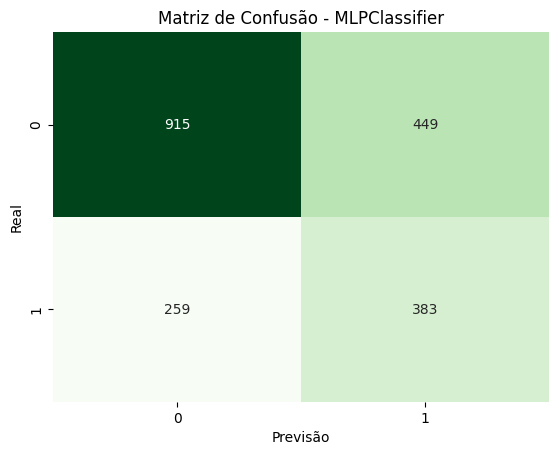

In [88]:
from sklearn.neural_network import MLPClassifier

modelo_mlp = MLPClassifier(random_state=42, max_iter=300)
modelo_mlp.fit(X_train_res, y_train_res)
y_pred_mlp = modelo_mlp.predict(X_test)

print("=== REDE NEURAL (MLP) ===")
print("Acurácia:", accuracy_score(y_test, y_pred_mlp))
print("Recall:", recall_score(y_test, y_pred_mlp))
cm = confusion_matrix(y_test, y_pred_mlp)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title("Matriz de Confusão - MLPClassifier")
plt.xlabel("Previsão")
plt.ylabel("Real")
plt.show()

###KNN

=== K-NEAREST NEIGHBORS (KNN) ===
Acurácia: 0.6395812562313061
Recall: 0.4984423676012461


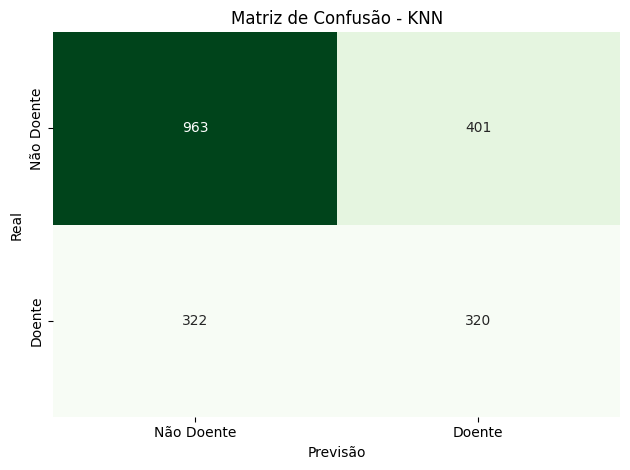

In [89]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=1601))
])

pipeline_knn.fit(X_train_res, y_train_res)
y_pred_knn = pipeline_knn.predict(X_test)

print("=== K-NEAREST NEIGHBORS (KNN) ===")
print("Acurácia:", accuracy_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))

cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Não Doente', 'Doente'],
            yticklabels=['Não Doente', 'Doente'])
plt.title("Matriz de Confusão - KNN")
plt.xlabel("Previsão")
plt.ylabel("Real")
plt.tight_layout()
plt.show()


###Gradient Boosting

=== GRADIENT BOOSTING ===
Acurácia: 0.6809571286141576
Recall: 0.6915887850467289


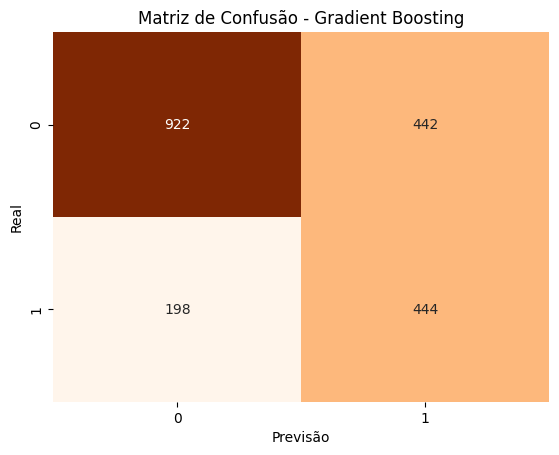

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

modelo_gb = GradientBoostingClassifier(random_state=42)
modelo_gb.fit(X_train_res, y_train_res)
y_pred_gb = modelo_gb.predict(X_test)

print("=== GRADIENT BOOSTING ===")
print("Acurácia:", accuracy_score(y_test, y_pred_gb))
print("Recall:", recall_score(y_test, y_pred_gb))
cm = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title("Matriz de Confusão - Gradient Boosting")
plt.xlabel("Previsão")
plt.ylabel("Real")
plt.show()
